In [1]:
# Librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import lightgbm

from joblib import dump, load

from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import KFold, StratifiedKFold

from scripts import class_scripts, light

# Options
pd.set_option('display.max_columns', 200)
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
# Import dataset
data = pd.read_pickle('../data/data_outputs/feature_engineered/cleaned_dataset.pkl')

In [8]:
# Splitting train, test and validation sets
df_train, df_test = train_test_split(data, test_size = 0.35, random_state = 42)

# LightGBM model

Réaliser un split sur plusieurs fold, puis blending

In [9]:
y_pred = light.kfold_lightgbm(df_train, df_test, 
                              num_folds=5, 
                              stratified = True, 
                              n_estimators = 5000, 
                              return_pred = True)

Starting LightGBM. Train shape: (199879, 380), test shape: (107628, 380)
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.809661	training's binary_logloss: 0.231956	valid_1's auc: 0.769887	valid_1's binary_logloss: 0.244132
[400]	training's auc: 0.845512	training's binary_logloss: 0.217967	valid_1's auc: 0.778116	valid_1's binary_logloss: 0.240882
[600]	training's auc: 0.872743	training's binary_logloss: 0.207443	valid_1's auc: 0.780355	valid_1's binary_logloss: 0.240089
[800]	training's auc: 0.893649	training's binary_logloss: 0.198533	valid_1's auc: 0.781167	valid_1's binary_logloss: 0.239788
[1000]	training's auc: 0.910581	training's binary_logloss: 0.190509	valid_1's auc: 0.781182	valid_1's binary_logloss: 0.239793
Early stopping, best iteration is:
[910]	training's auc: 0.903494	training's binary_logloss: 0.193994	valid_1's auc: 0.781272	valid_1's binary_logloss: 0.239793
Fold  1 AUC : 0.781272
Training until validation scores don't improve for

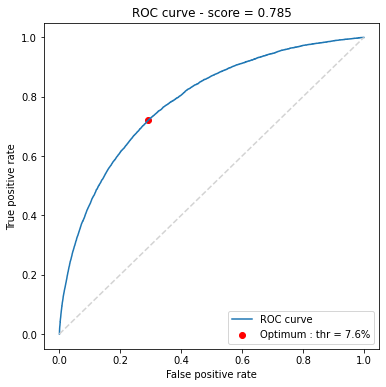

In [10]:
# Prediction and score
plt.figure(figsize = (6,6))
y_test = df_test['TARGET']
class_scripts.plot_roc(y_test, y_pred)
plt.show()

# Kaggle submission

In [3]:
# Load test set
data_test = pd.read_pickle('../data/data_outputs/feature_engineered/cleaned_dataset_test.pkl')

In [4]:
# Prediction for test set
y_pred = light.kfold_lightgbm(data, data_test, 
                              num_folds=5, 
                              stratified = True, 
                              n_estimators = 5000, 
                              return_pred = True)

Starting LightGBM. Train shape: (307507, 380), test shape: (48744, 380)
Training until validation scores don't improve for 200 rounds
[200]	training's auc: 0.797497	training's binary_logloss: 0.235276	valid_1's auc: 0.772269	valid_1's binary_logloss: 0.242756
[400]	training's auc: 0.825378	training's binary_logloss: 0.224536	valid_1's auc: 0.782489	valid_1's binary_logloss: 0.238703
[600]	training's auc: 0.847112	training's binary_logloss: 0.216662	valid_1's auc: 0.785378	valid_1's binary_logloss: 0.237646
[800]	training's auc: 0.864839	training's binary_logloss: 0.21006	valid_1's auc: 0.786173	valid_1's binary_logloss: 0.237338
[1000]	training's auc: 0.879781	training's binary_logloss: 0.204022	valid_1's auc: 0.786579	valid_1's binary_logloss: 0.23717
[1200]	training's auc: 0.892766	training's binary_logloss: 0.198412	valid_1's auc: 0.786849	valid_1's binary_logloss: 0.237044
[1400]	training's auc: 0.90408	training's binary_logloss: 0.193165	valid_1's auc: 0.786943	valid_1's binary_lo

In [5]:
# Export submission
df_submission = pd.DataFrame(y_pred, index = data_test['SK_ID_CURR'])
df_submission.to_csv('submission.csv')

# Storing the model

In [4]:
# Retrieve classifiers
classifiers = light.kfold_lightgbm(data, data_test, 
                              num_folds=5, 
                              stratified = True, 
                              n_estimators = 5000, 
                              return_clf = True)

Starting LightGBM. Train shape: (307507, 380), test shape: (48744, 380)
[200]	training's auc: 0.797497	training's binary_logloss: 0.235276	valid_1's auc: 0.772269	valid_1's binary_logloss: 0.242756
[400]	training's auc: 0.825378	training's binary_logloss: 0.224536	valid_1's auc: 0.782489	valid_1's binary_logloss: 0.238703
[600]	training's auc: 0.847112	training's binary_logloss: 0.216662	valid_1's auc: 0.785378	valid_1's binary_logloss: 0.237646
[800]	training's auc: 0.864839	training's binary_logloss: 0.21006	valid_1's auc: 0.786173	valid_1's binary_logloss: 0.237338
[1000]	training's auc: 0.879781	training's binary_logloss: 0.204022	valid_1's auc: 0.786579	valid_1's binary_logloss: 0.23717
[1200]	training's auc: 0.892766	training's binary_logloss: 0.198412	valid_1's auc: 0.786849	valid_1's binary_logloss: 0.237044
[1400]	training's auc: 0.90408	training's binary_logloss: 0.193165	valid_1's auc: 0.786943	valid_1's binary_logloss: 0.236984
[1600]	training's auc: 0.913849	training's bin

In [16]:
for i in range(5):
    print(classifiers[i].predict_proba(data_test.drop(columns = ['TARGET', 'SK_ID_CURR']).iloc[1043].values.reshape(1, -1)))

[[0.98976238 0.01023762]]
[[0.98869136 0.01130864]]
[[0.98747568 0.01252432]]
[[0.98731196 0.01268804]]
[[0.99025488 0.00974512]]


In [18]:
# Store classifiers
dump(classifiers, './data/data_outputs/LGBM_classifiers.joblib')